데이터구조 [분반]

학번: 00000000
 
이름: 아무개

소개: 네이버 웹툰에 있는 썸네일들 ADT으로 표현하였습니다


# HW1 숙제: 요구사항

1. 파일이름 변경: 데이터구조[분반] 학번 이름
   - 데이터구조[01] 2100000 홍길동
   - 연속적인 아이템(데이터)를 포함하는 관련 이미지 1개 첨부
2. 5개 이상 다른 데이터 필드(Data field)를 포함
   - 적절한 ADT 클래스 생성 및 인스턴스 출력
   - 변수을 추가하고, 32p를 참고하여 적절한 변수 유형을 표기할 것
  - print 함수를 사용하여 적어도 2개의 인스턴스를 출력
3. sejinc2021@gmail.com 과 공유(화면 우측 상단)
  - 잘못 공유시 미제출로 인정
  - 제출 마감기간: 5월 31일까지




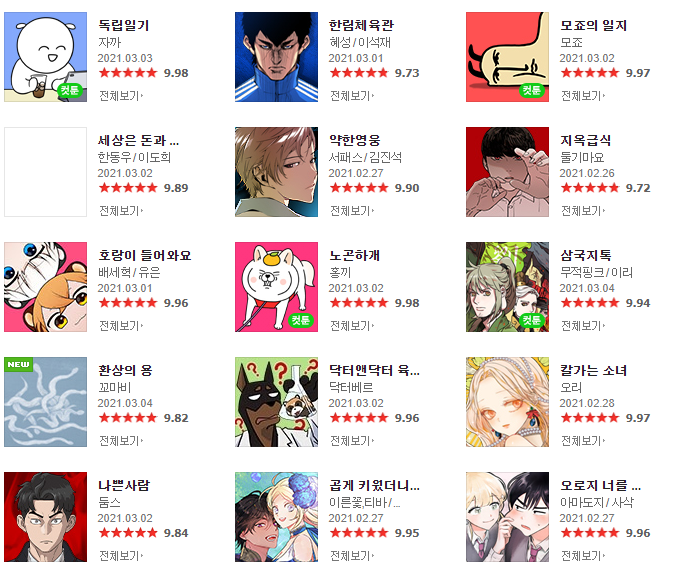

In [ ]:
'''
  웹툰(Webtoon) 클래스
  ** linked list를 위한 next 링크를 만듬
'''
class Webtoon:
   def __init__(self, title, author, published_date, rating, img):
      self.title = title # 문자열
      self.author = author # 문자열
      self.published_date = published_date # 문자열
      self.rating = rating  # float
      self.img = img # 문자열
      self.next = None # 이동 레퍼런스
   
   # print 하는 내용을 아래와 같은 형태로 변경할 수 있음.
   # w = Webtoon(...) 
   # print(w) 시 아래와 같은 내용으로 출력
   def __repr__(self):
      return f"WEBTOON [title: {self.title}, author:{self.author}, published_date: .... ]"

In [ ]:
w1 = Webtoon( "나쁜사람", "둠스", "2021-03-02", 9.84, "http://test/bad")
w2 = Webtoon( "환상의용", "꼬마비", "2021-03-04", 9.82, "http://test/draggoon")
print(w1)
print(f'웹툰 {w2.title} 작가명: {w2.author} 평점: {w2.rating}')
print('웹툰 {title} 작가명 {author} 평점 {rating}'.format(title=w1.title, author=w1.author, rating=w1.rating))

WEBTOON [title: 나쁜사람, author:둠스, published_date: .... ]
웹툰 환상의용 작가명: 꼬마비 평점: 9.82
웹툰 나쁜사람 작가명 둠스 평점 9.84


# HW2 숙제: 요구사항

1. 데이터베이스는 2개 Item DB와 User DB가 존재해야 하며, 각각 5만, 1만개의 레코드를 가지고 있다. 데이터 생성 작업을 통해 요구되는 레코드가 생성된다. (20점)

2. Item DB는 특정 class의 인스턴스를 포함하는 단순 링크드 리스트로 구축되어하며, User DB는 2D List 구조 형태로 데이터를 관리한다. User DB의 레코드는 ( name, age, favorite)으로 구성된다. (20점)

3. 데이터 검색 연산은 특정 문자열 키워드에 대해 데이터 베이스를 한번에 검색할 수 있는 시스템을 구축해야한다. 모두 찾을 때까지 검색을 수행한다. (하나의 특정 컬럼만 검색하면 됨) e.g., name=”Jane”인 레코드가 두개 있다면, 두개 레코드를 반환해야 함. (20점)

4. 정렬 연산은 bubble/insert/selection sort 중의 하나를 사용하여 users들을 오름차순 혹은 내림차순으로 변경할 수 있어야한다. (오름차 / 내림차에 대한 명령을 받아야한다) (20점)

5. 추가/삭제 연산은 삭제 기능만 구현하며, 입력된 키워드에 대응되는 모른 레코드를 삭제한다. (하나의 특정 컬럼만 검색하면 됨) e.g., name=”Jane”인 경우 모두 삭제 (20점)

## BMS Class (Extended)

In [ ]:
'''
  Bigdata Management System ADT 
  BMS ADT (Extended)
'''
class BMS:
  '''
    BMS 생성자
    db_size: 아이템[0], 사용자 DB[1]를 생성함 , LIST 타입
  '''
  def __init__(self, db_size):
    self.db_size = db_size
    self.generate_db() # 데이터 베이스 생성

  # 요구사항 1과 2
  # 링크드 리스트 기반 ItemDB
  # 2d 리스트 기반 userDB
  '''
    데이터 생성
  '''
  def generate_db(self):
    self.items = ItemDB(self.db_size[0]) # 링크드 리스트
    self.users = UserDB(self.db_size[1]) # 2D 배열

  '''
    데이터 검색
    keyword: 검색할 키워드
  '''
  def search(self, keyword):
    # 결과에는 데이터형 관계없이 추가가가능
    results = []

    # 링크드 리스트 탐색
    curNode = self.items.pHead
    while curNode is not None:
      if curNode.author == keyword:
        results.append(curNode)
      ### 검색 조건
      curNode = curNode.next

    # 사용자DB 탐색
    for i in range(len(self.users.data)):
      # 사용자 이름과 keyword가 매칭될때
      if self.users.data[i][0] == keyword: 
        results.append(self.users.data[i])
    
    return results

  '''
    데이터 정렬 (사용자DB만)
    버블 정렬을 사용함
    order_by: asc 오름차, 그외 내림차
  '''
  def sort(self, order_by='asc'):
    # 버블정렬을 사용함
    N = len(self.users.data)-1
    for i in range( N -1 ):
      for j in range( N - i - 1 ):
          if order_by == 'asc': # 오름차순
              if self.users.data[j][1] > self.users.data[j+1][1] :
                 tmp = self.users.data[j]
                 self.users.data[j] = self.users.data[j+1]
                 self.users.data[j + 1] = tmp 
          else: # 내림차순
              if self.users.data[j][1] < self.users.data[j+1][1] :
                 tmp = self.users.data[j]
                 self.users.data[j] = self.users.data[j+1]
                 self.users.data[j + 1] = tmp 

  '''
    데이터 삭제 (아이템DB, 사용자DB 모두)
    keyword: 삭제할 키워드
  '''
  def delete(self, keyword):
    # 삭제할 내용에 대해 저장
    deleted = list()
    
    # 아이템DB에서 keyword에 매칭되는 author 를 찾아 해당 노드 삭제
    curNode = self.items.pHead
    prevNode = None
    while curNode is not None:
      # keyword에 매칭되는 author 찾았다면
      if curNode.author == keyword:
        self.items.size -= 1
        if curNode is self.items.pHead:
           self.items.pHead = curNode.next
        else:
          prevNode.next = curNode.next
      # 다음 노드로 이동        
      prevNode = curNode
      curNode = curNode.next
        
    # 사용자DB로부터 keyword에 매칭되는 user 이름를 찾아 제거
    # ** 제거하는 경우, index크기가 변화되서 에러가 발생되기 때문에 
    # ** 매칭되는 것을 제외하고 existing_list에 복사한뒤, 새로운 사용자DB를 생성
    # ** 더 좋은 방법이 존재할 수 있음.
    existing_list = list()
    for user in self.users.data:
      if user[0] != keyword:
          existing_list.append(user)
      else:
          deleted.append(user)
    self.users.data = existing_list

    return len(deleted)
  
  '''
    ItemDB 데이터베이스 내용 출력
    limit: 최대 출력할 갯수
  '''
  def print_item_db(self, limit):  
    i = 0 
    p = limit
    curNode = self.items.pHead
    while i < p and curNode is not None:
      print(curNode)
      i += 1
      curNode = curNode.next
  
  '''
    UserDB 데이터베이스 내용 출력
    limit: 최대 출력할 갯수
  '''
  def print_user_db(self, limit):
    for i in range(limit):
      print(self.users.data[i])


  """
      사용자DB로부터 사용자 레코드를 가져옴
      nums: 가져올 레코드의 수
  """
  def get_users(self, nums):
      start = self.cursor_user_db
      end = start + nums

      self.cursor_user_db = end
      results = self.users.data[start:end]

      return results

  """
      아이템DB로부터 아이템 레코드를 가져옴
      지속적으로 데이터를 가져올경우에 대비하여, self.cursor_item_db 를 어디까지 데이터가 반환되었는지에 대해 추적할 것.
      nums: 가져올 레코드의 수
  """
  def get_items(self, nums):
      # statements
      results = [] # 리스트로 저장해도 관계없음.
      return results      
      

## ITEM 및 USER DB Class

In [ ]:
import numpy as np
monthly_days = np.arange(0, 30)
base_date = np.datetime64('2021-03-01')
# names라는 라이브러리 인스톨
!pip install names  
import names
import random
import string

# 요구사항 2: 링크드 리스트 기반의 아이템 데이터베이스
class ItemDB: 
  '''
    아이템DB 생성자
    nums: 생성할 레코드의 수
  '''
  def __init__(self, nums):
    self.pHead = None
    self.pTail = None
    self.size = 0
    self.nums = nums
    self.generate_db()

  '''
    사용자DB를 생성
  '''
  def generate_db(self):
    # 랜덤 데이터 와 함께 생성
    for i in range(self.nums):
      # 랜덤 데이터와 함께 인스턴스 생성
      title = ''.join(random.choice(string.ascii_lowercase) for i in range(5))
      author = names.get_first_name(gender='female')
      published_date = base_date + np.random.choice(monthly_days)
      rating = round(random.uniform(1, 10), 2)
      img = ''.join(random.choice(string.ascii_lowercase) for i in range(5))

      # 인스턴스 생성
      webtoon = Webtoon(title, author, published_date, rating, img)

      # 링크드 리스트 데이터 추가
      if self.pHead is None:
         self.pHead = webtoon
      else: # 한개 이상이 있는 경우
         self.pTail.next = webtoon

      self.pTail = webtoon
      self.size += 1

In [ ]:
# 2d리스트 기반 사용자 데이터베이스
class UserDB: # 리스트를 상속(inheritance)받아 바로 리스트 접근가능
    '''
      사용자DB 생성자(초기화)
      nums: 생성할 레코드의 수
    '''
    def __init__(self, nums):
      self.data = list() # 이와 같이 별도의 리스트를 생성해도 무관
      self.nums = nums
      self.generate_db()
     
    '''
      사용자DB 생성
    '''
     # 데이터베이스 생성
    def generate_db(self):              
       for i in range(self.nums):
        # 랜덤데이터 생성
        name = names.get_first_name(gender='female')
        age = random.randint(1, 1000)
        favorite = ''.join(random.choice(string.ascii_lowercase) for i in range(5))
        user = [name,age,favorite]

        self.data.append(user) # 데이터 추가

## 프로그램 테스트

In [ ]:
# 요구사항 1, 2
bms = BMS([50000,10000]) # 5만개,1만개 생성, 테스트 경우, 사이즈를 줄인뒤 실행 
bms.print_item_db(10) # 아이템 DB 출력 10개
bms.print_user_db(10) # 사용자 DB 출력 10개

WEBTOON [title: pqihc, author:Nancy, published_date: .... ]
WEBTOON [title: rrwyx, author:Holly, published_date: .... ]
WEBTOON [title: lvqmw, author:Marie, published_date: .... ]
WEBTOON [title: voxxx, author:Elnora, published_date: .... ]
WEBTOON [title: bxrer, author:Jamie, published_date: .... ]
WEBTOON [title: qhdto, author:Beverly, published_date: .... ]
WEBTOON [title: kceer, author:Dedra, published_date: .... ]
WEBTOON [title: aqhhj, author:Florence, published_date: .... ]
WEBTOON [title: dmvtr, author:Joyce, published_date: .... ]
WEBTOON [title: dwxqv, author:Annie, published_date: .... ]
['Leola', 642, 'ywyad']
['Lynne', 915, 'pfetb']
['Cara', 93, 'hvomh']
['Jessica', 929, 'cfbqq']
['Mirian', 848, 'dhmvn']
['Nancy', 388, 'oqtgk']
['Tina', 658, 'gzbiz']
['Bertha', 795, 'ktseq']
['Heather', 808, 'ldjzz']
['Helen', 597, 'qjieo']


In [ ]:
# 검색 및 삭제할 키워드
keyword = bms.users.data[0][0]
print(keyword)

Leola


In [ ]:
# 요구사항 3
results = bms.search(keyword)
# 임시 리스트 생성
tmp_items = []
tmp_users = []
for result in results:
  if isinstance(result, Webtoon):
    tmp_items.append(result)
  else:
    tmp_users.append(result)

print(results)
print("검색된 아이템의 수: {n_item} 검색된 아이템의 수: {n_user}".format(n_item=len(tmp_items), n_user=len(tmp_users)))

[WEBTOON [title: yigjn, author:Leola, published_date: .... ], WEBTOON [title: ljqxb, author:Leola, published_date: .... ], WEBTOON [title: enfxy, author:Leola, published_date: .... ], WEBTOON [title: yteoc, author:Leola, published_date: .... ], WEBTOON [title: hcfoo, author:Leola, published_date: .... ], WEBTOON [title: cgjuc, author:Leola, published_date: .... ], WEBTOON [title: felri, author:Leola, published_date: .... ], WEBTOON [title: trruq, author:Leola, published_date: .... ], WEBTOON [title: fvikb, author:Leola, published_date: .... ], WEBTOON [title: extuh, author:Leola, published_date: .... ], ['Leola', 642, 'ywyad'], ['Leola', 780, 'ormik'], ['Leola', 637, 'hflfz']]
검색된 아이템의 수: 10 검색된 아이템의 수: 3


In [ ]:
# 요구사항 4
# 사용자DB를 정렬하고 AGE 순으로 정렬되었는지를 확인
bms.sort('asc') 
bms.print_user_db(10) # 사용자 DB 출력 10개

['Krystal', 1, 'sedqo']
['Clara', 1, 'vbzrg']
['Kathy', 1, 'ywlkf']
['Maria', 1, 'ceaho']
['Janis', 1, 'hzvfp']
['Youlanda', 1, 'hszcf']
['Michelle', 1, 'zrbdw']
['Wanda', 1, 'dospq']
['Patricia', 1, 'gwxlh']
['Angel', 1, 'sadwt']


In [ ]:
bms.delete(keyword) # 요구사항 5
bms.print_item_db(10) # 사용자 DB 출력 10개
bms.print_user_db(10) # 사용자 DB 출력 10개

WEBTOON [title: pqihc, author:Nancy, published_date: .... ]
WEBTOON [title: rrwyx, author:Holly, published_date: .... ]
WEBTOON [title: lvqmw, author:Marie, published_date: .... ]
WEBTOON [title: voxxx, author:Elnora, published_date: .... ]
WEBTOON [title: bxrer, author:Jamie, published_date: .... ]
WEBTOON [title: qhdto, author:Beverly, published_date: .... ]
WEBTOON [title: kceer, author:Dedra, published_date: .... ]
WEBTOON [title: aqhhj, author:Florence, published_date: .... ]
WEBTOON [title: dmvtr, author:Joyce, published_date: .... ]
WEBTOON [title: dwxqv, author:Annie, published_date: .... ]
['Krystal', 1, 'sedqo']
['Clara', 1, 'vbzrg']
['Kathy', 1, 'ywlkf']
['Maria', 1, 'ceaho']
['Janis', 1, 'hzvfp']
['Youlanda', 1, 'hszcf']
['Michelle', 1, 'zrbdw']
['Wanda', 1, 'dospq']
['Patricia', 1, 'gwxlh']
['Angel', 1, 'sadwt']


In [ ]:
# 요구사항 3 
# 다시 검색하면 관련데이터는 삭제되었기 때문에 자료가 없어야함
print("수정된 아이템DB의 크기: {n_item_db} 수정된 사용자DB의 크기: {n_user_db}".format(n_item_db=len(bms.users.data), n_user_db=bms.items.size))
results = bms.search(keyword)
print(f"{keyword}를 사용자, 아이템DB에서 다시 검색한 결과: {len(results)}")

수정된 아이템DB의 크기: 9997 수정된 사용자DB의 크기: 49990
Leola를 사용자, 아이템DB에서 검색한 결과 0


# HW3 숙제: 요구사항

1. BMS는 데이터 로딩을 통해 Triple Stack(TS)과 Blocking Circular Queue(BCQ)에 데이터를 지속적으로 추가한다. 코드 1은 TS에 대한 데이터 로딩 연산이고, 코드 2는 BCQ에 대한 데이터 로딩 연산이다. get_users(N)와 get_items(N)의 메소드를 확장 구현하시오. (20점)

코드 1과 2가 제대로 실행되기 위해서는 TS와 BCQ에 대한 class를 각각 구현해야 한다.

2. TS은 다른 유형의 데이터를 보관하는 세 개의 스택(A-C)으로 구성된다. 구체적으로, 각 스택은 사용자의 이름과 나이에 따라서 다른 데이터들을 보관한다. (40점)

3. BCQ는 enqueue 작업을 일시적으로 보류하는 기능(Blocking)을 가진 순환 큐(Circular Queue)이다. 구체적으로, BCQ는 최대 적재용량(maximum capacity)를 가지며, 리스트 기반의 순환 큐로 구성된다. 또한, BCQ는 Full 상태가 되면 25%까지 dequeue만 가능하고, 25%미미만일 때 enqueue/dequeue가 모두 가능해진다. (40점)

## TripleStack class

In [ ]:
"""
    TripleStack ADT
    isEmpty() -> bool
    push_and_assort(_users) -> bool 
    pop_multi(nums, no) -> list
    get_highest_stack -> int
"""
class TripleStack:
    def __init__(self, limit):
        self.stacks = []  # stack[0], stack[1], stack[2]
        self.limit = limit
        for i in range(3):
            self.stacks[i] = []

    """
        isEmpty: 빈스택이 하나라도 비어 있으면 true 그게 아니라면 false 값을 반환
        return: bool
    """
    def isEmpty(self) -> bool:
        # statements
        return True
    """
        push_and_assort: userdb로부터 n개 임의의 데이터를 요청하고 가져와서 데이터의 특징에 따라 데이터를 추가함
        users: a list of users   
    """

    def push_and_assort(self, _users) -> bool:
        n_discarded = 0
        for user in _users:
            username = user[0]
            if 'A' <= username[0] <= 'L':  # A group (Usernames startingwith A-L)
                self.stacks[0].append(user)
            elif 'L' <= username[0] <= 'S' and user[1] > 50:  # B group (Names startingwith L-S and age > 50)
                self.stacks[1].append(user)
            elif 'M' <= username[0] <= 'Z':
                self.stacks[2].append(user)
            else:  # discard other users
                n_discarded += 1

        return True
    """
        pop_multi: 주어진 Stack에서 m개의 데이터를 빼낸다. 주어진 스택 내 데이터 수가 m보다 작다면 주어진 모든 수의 데이터를 빼낸다.
        nums: pop될 데이터의 수
        no: 선택 
    """
    def pop_multi(self, nums, no):
        stack_size = len(self.stacks[no])
        if nums > stack_size:
            return [self.stacks[no].pop() for i in range(stack_size)]
        else: # nums < stack_size (빼낼데이터 보다 더 많이 가지고 있는 경우)
            return [self.stacks[no].pop() for i in range(nums)]
    """
        get_highest_stack: 가득찬 스택의 번호를 반환
        return: 스택 번호 (0,1,2)
    """
    def get_highest_stack(self) -> int:
        # statements
        no = 1
        return no

## Blocking Circular Queue

In [ ]:
"""
    CustomBCQ(Blocking Circular Queue)
"""
class CustomBCQ:
    def __init__(self, maxSize):
        self._count = 0
        self._front = 0
        self._limit = maxSize
        self._back = maxSize - 1
        self.isBlocked = False
        self._queue = list()

    def isEmpty(self):
        return self._count == 0

    def isFull(self):
        if self._count == self.limit:
            self.isBlocked = True
            return True
        else:
            return False

    def enqueue(self, item):
        if not self.isBlocked:
            # statement
            self._count += 1
        else:
            return False

    def dequeue(self):
        # percentage를 구하는 방법
        quotient = self._count / self._limit
        percentage = quotient * 100 # 25%

        if percentage < 25 and self.isBlocked == False:
            self.isBlocked = True
        # statements

## 프로그램 테스트

In [ ]:
# TripleStack
ts = TripleStack(100)
while not ts.isEmpty():
    users = bms.get_users(100)
    ts.push_and_assort(users)
    no_stack = ts.get_highest_stack()
    ts.pop_multi(100, no_stack)

In [ ]:
# Bounded Circular Queue
bcq = CustomBCQ(100)
users = bms.get_items(10000)
stages = 0
for i, user in enumerate(users):
    n_dequeued, n_enqueued = 0, 0
    while not bcq.isFull():
        bcq.enqueue(user)
        n_enqueued += 1

    while not bcq.isEmpty():
        bcq.dequeue()
        n_dequeued += 1

    print(f'stage {stages}: enqueue된 작업의 수 {n_enqueued}  dequeue된 작업의 수 {n_dequeued}')
